In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
sns.set(style="darkgrid")

/home/ericvenarusso/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
!ls

input  monsters.ipynb


In [3]:
train_df = pd.read_csv('input/train.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [5]:
train_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [6]:
grouped_mst = pd.DataFrame(train_df.groupby('type').size()).reset_index()
grouped_mst.rename(columns={0:'count'}, inplace=True)

grouped_mst

,type,count
0,Ghost,117
1,Ghoul,129
2,Goblin,125


/home/ericvenarusso/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


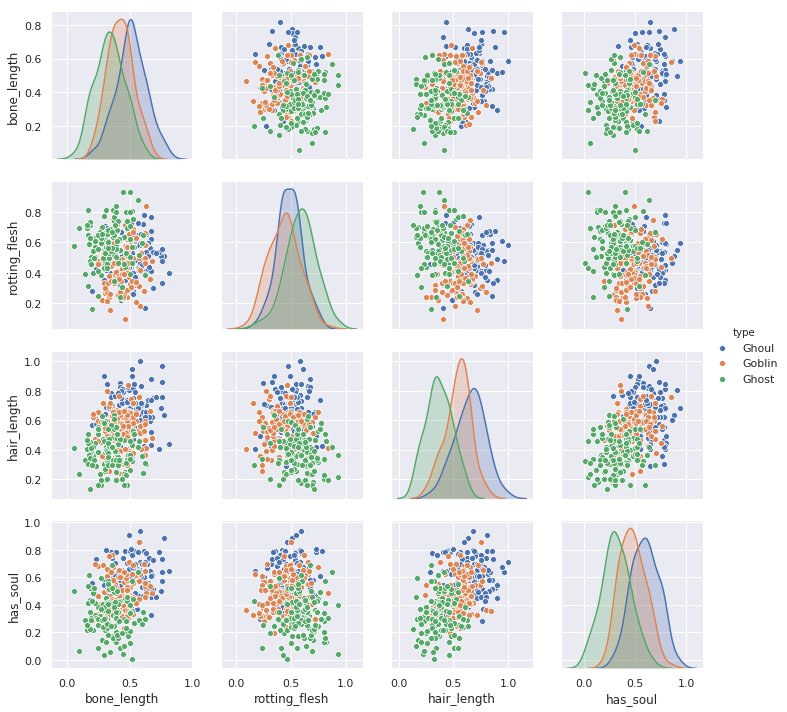

In [7]:
sns.pairplot(train_df.drop(['id'], axis=1), hue='type')

In [8]:
train_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']] = scaler.fit_transform(train_df[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']])

/home/ericvenarusso/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


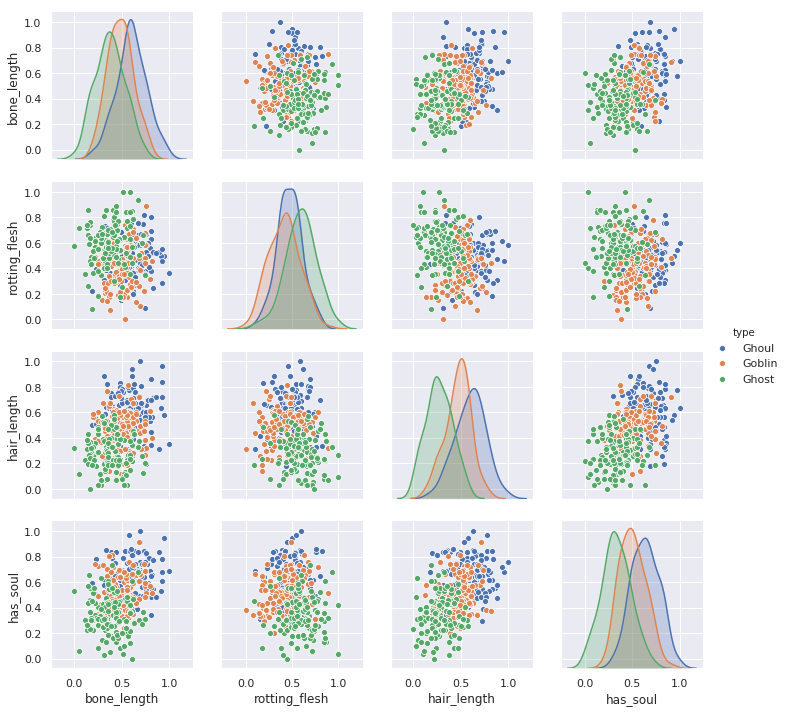

In [10]:
sns.pairplot(train_df.drop(['id'], axis=1), hue='type')

In [11]:
grouped_monsters = pd.DataFrame(train_df.groupby(['color', 'type']).size()).reset_index()
grouped_monsters.rename(columns={0:'count'}, inplace=True)

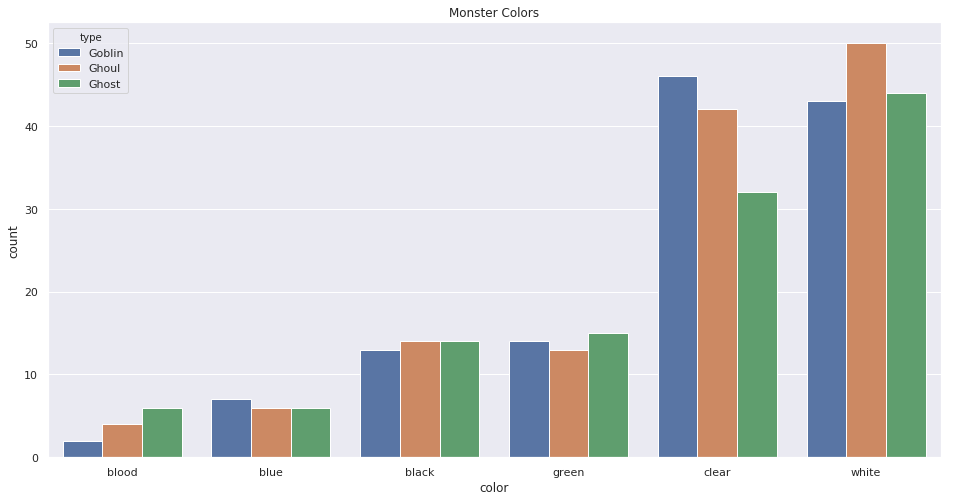

In [12]:
plt.figure(figsize=(16, 8))
sns.barplot(x='color', y='count', hue='type', data=grouped_monsters.sort_values('count'))
title = plt.title("Monster Colors")

In [13]:
train_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.388217,0.304922,0.382668,0.833125,clear,Ghoul
1,1,0.680620,0.394586,0.458518,0.464739,green,Goblin
2,2,0.538175,0.309094,0.782316,0.844010,black,Ghoul
3,4,0.946626,0.493602,0.580270,0.944665,black,Ghoul
4,5,0.668128,0.932355,0.328164,0.676911,green,Ghost


In [14]:
target = {
          "Ghoul": 0,
          "Goblin": 1,
          "Ghost": 2
         }

In [15]:
train_df["target"] = train_df["type"].apply(lambda x: target[x])

In [16]:
train_df = pd.get_dummies(train_df, columns=['color'], drop_first = True)

In [17]:
train_X = train_df.drop(['id', 'type', 'target'], axis = 1)
train_y = train_df['target']

In [18]:
train_X.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,0.388217,0.304922,0.382668,0.833125,0,0,1,0,0
1,0.680620,0.394586,0.458518,0.464739,0,0,0,1,0
2,0.538175,0.309094,0.782316,0.844010,0,0,0,0,0
3,0.946626,0.493602,0.580270,0.944665,0,0,0,0,0
4,0.668128,0.932355,0.328164,0.676911,0,0,0,1,0


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, verbose=4, n_jobs=-1)
grid.fit(train_X, train_y) 

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6048387096774194, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.34959349593495936, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.34959349593495936, total=   0.0s


[Parallel(n_jobs=-1)]: Done   7 out of  48 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [20]:
test_df = pd.read_csv('input/test.csv')

test_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test_df[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']] = scaler.fit_transform(test_df[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']])
test_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706199,0.698537,black
1,6,0.427332,0.645024,0.565648,0.451462,white
2,9,0.549602,0.491931,0.660493,0.449809,black
3,10,0.638095,0.682867,0.471484,0.356924,white
4,13,0.361762,0.583997,0.377317,0.276364,black


In [22]:
test_df = pd.get_dummies(test_df, columns=['color'], drop_first = True)
test_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,3,0.471774,0.387937,0.706199,0.698537,0,0,0,0,0
1,6,0.427332,0.645024,0.565648,0.451462,0,0,0,0,1
2,9,0.549602,0.491931,0.660493,0.449809,0,0,0,0,0
3,10,0.638095,0.682867,0.471484,0.356924,0,0,0,0,1
4,13,0.361762,0.583997,0.377317,0.276364,0,0,0,0,0


In [23]:
test_X = test_df.drop('id', axis = 1)
predict = grid.predict(test_X)

In [24]:
predicted = {
              0 : "Ghoul",
              1 : "Goblin",
              2 : "Ghost"
            }

In [25]:
predicted[0]

'Ghoul'

In [26]:
pred = pd.DataFrame({'id': test_df['id'], 'type': predict})
pred["type"] = pred["type"].apply(lambda x: predicted[x])
pred.to_csv('input/predict.csv', header = True, index = False)